### Example distributions

n-dimensional array of real numbers

In [471]:
## Standard
from scipy import stats

distributions = {
    "uniform": stats.uniform(),
    "normal": stats.norm(.5, .1),
    "beta": stats.beta(3,9),
}

N_samples = 1000

In [303]:
## FANCY (but random)
#### random points, independently sampled from a randomly chosen distribution
class Fancy:
    def __init__(self, distrs: dict):
        self.distrs = distrs
    
    def rvs(self, n: int):
        import random
        return [random.choice(list(self.distrs.values())).rvs() for i in range(n)]

# Good representations

## Standard Representations

[0.85851221 0.45229694 0.33086767 0.14612658 0.05328185 0.70498987
 0.57178958 0.21614408 0.22173773 0.05947869]
[0.52116025 0.54848658 0.64972477 0.36184546 0.42309835 0.53233703
 0.55828725 0.37365042 0.44470532 0.55262512]
[0.43848465 0.33263326 0.39053536 0.24751674 0.17157705 0.49301365
 0.07139018 0.30869059 0.17309775 0.15196218]
         uniform    normal      beta
mean    0.490878  0.503562  0.241931
median  0.477806  0.504857  0.226446


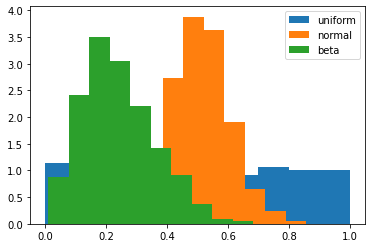

In [473]:
import matplotlib.pyplot as plt
import numpy as np

reps = {}
for key, distr in distributions.items():
    points = distr.rvs(size=N_samples)
    print(points[:10])
    reps[key] = {"mean":np.mean(points), "median":np.median(points)}
    _ = plt.hist(points, histtype='stepfilled', density=True)

#     print(np.mean([np.array(points)<np.mean(points)]))
#     print(np.percentile(points, 2.5), np.percentile(points, 97.5))
_ = plt.legend(distributions.keys())

import pandas as pd
print(pd.DataFrame(reps))

Mean: 0.4483132381516701
Median: 0.4594242312726746


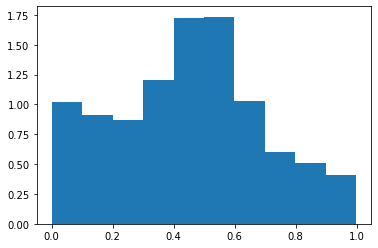

In [467]:
points = Fancy(distributions).rvs(N_samples)
print(f"Mean: {np.mean(points)}")
print(f"Median: {np.median(points)}")
_ = plt.hist(points, histtype='stepfilled', density=True)

## Confidence intervals

In [422]:
## Median -> Percentiles

assert np.median(points) == np.percentile(points, 0.5*100)

In [439]:
## Confidence intervals

def percentile_around_mean(points, q):
    mean_percentile = np.mean([np.array(points)<np.mean(points)])*100
    print("Mean percentile: ", mean_percentile)
    lower = mean_percentile - q/2 if mean_percentile > (q/2) else 0
    upper = mean_percentile + q/2 if mean_percentile + (q/2) < 100 else 100
    return (np.percentile(points, lower), np.percentile(points, upper))

def percentile_around_median(points, q):
    p = 100-q
    return (np.percentile(points, p/2), np.percentile(points, 100-p/2))

In [255]:
def plot_lines(points):
    _ = plt.axvline(np.mean(points), color='red', linestyle='dashed', linewidth=1)
    for i in range(10,100, 10):
        _ = plt.axvline(np.percentile(points, i), color='white' if i==50 else 'k', linestyle='dashed', linewidth=1)

Mean percentile:  51.6
95th percentile around mean: (0.08832559897135207, 0.961802734001445)
95th percentile around median: (0.0696154789874595, 0.9095934336888617)


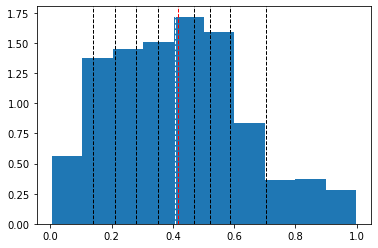

In [474]:
## Fancy
points = Fancy(distributions).rvs(N_samples)

N_percentile = 50
print(f"{N_percentile}th percentile around mean: {percentile_around_mean(points, N_percentile)}")
print(f"{N_percentile}th percentile around median: {percentile_around_median(points, N_percentile)}")

_ = plt.hist(points, histtype='stepfilled', density=True)
plot_lines(points)

Mean percentile:  50.1
50th percentile around mean: (0.435887429042142, 0.572390756034899)
50th percentile around median: (0.43527421655122284, 0.5720189762466207)


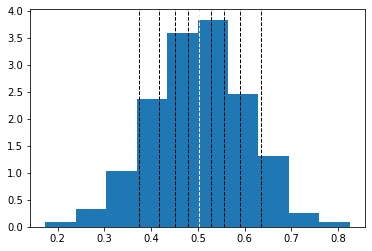

In [446]:
## Normal

points = distributions["normal"].rvs(N_samples)

N_percentile = 50
print(f"{N_percentile}th percentile around mean: {percentile_around_mean(points, N_percentile)}")
print(f"{N_percentile}th percentile around median: {percentile_around_median(points, N_percentile)}")

_ = plt.hist(points, histtype='stepfilled', density=True)
plot_lines(points)

# Good distributions

approximate the population distribution

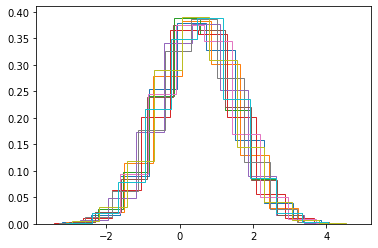

In [481]:
## Normal
SAMPLE_SIZE = 10000
for i in range(10):
    _ = plt.hist(stats.norm(.5, 1).rvs(SAMPLE_SIZE), histtype='step', density=True)


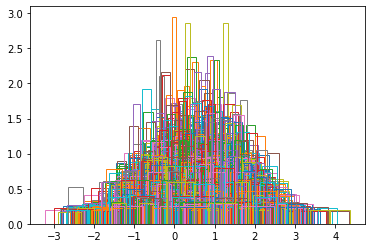

In [480]:
SAMPLE_SIZE = 10
for i in range(1000):
    _ = plt.hist(stats.norm(.5, 1).rvs(SAMPLE_SIZE), histtype='step', density=True)
    

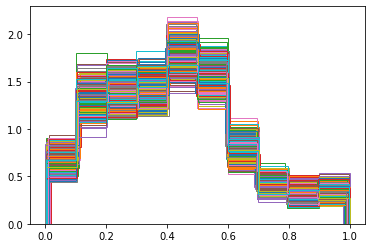

In [476]:
## Fancy
for i in range(1000):
    _ = plt.hist(Fancy(distributions).rvs(1000), histtype='step', density=True)

## Sampling Distribution

A sampling distribution is a probability distribution of a statistic obtained from a larger number of samples drawn from a specific population.

### Traditional

make assumptions and fit

#### Beta

FIT
0.617 0.4861182983595659


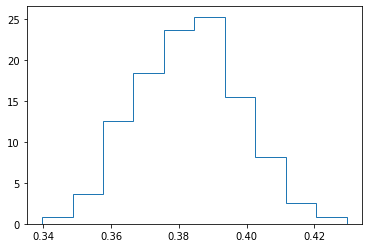

In [458]:
N_samples = 1000
P = 0.6

bernoulli = stats.bernoulli(P)
points = bernoulli.rvs(N_samples)

## beta-binomial
## BAYES THEOREM := Posterior = Prior * Likelihood
predicted_distr = stats.beta(np.sum([np.array(points)==0]), np.sum([np.array(points)==1]))
predicted_points = predicted_distr.rvs(N_samples)
_ = plt.hist(predicted_points, histtype='step', density=True)
print("FIT")
print(np.mean(points), np.std(points))

### Bootstrapping

resample the data. many, many times

Mean: 0.4483377580720604
Median: 0.4482897716804366


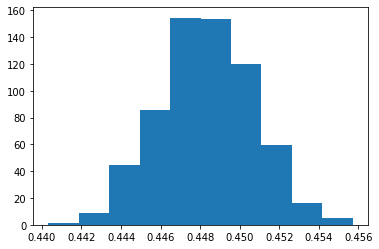

In [283]:
[1,2,3,4,5] -> [1,3,4,5,2] -> [1,2,3,4,4]
points = Fancy(distributions).rvs(N_samples)
## choosing with REPLACEMENT
means = [np.mean(random.choices(points, k=len(points))) for i in range(1000)]
print(f"Mean: {np.mean(means)}")
print(f"Median: {np.median(means)}")
_ = plt.hist(means, histtype='stepfilled', density=True)

Did we just replace one distribution by another ?

# NO

##### Central Limit Theorem

given a sufficiently large sample size, the sampling distribution of the mean for a variable will approximate a normal distribution regardless of that variable’s distribution in the population. R.V -> i.i.d

Here we know what a good representation is! 
Mean, median, mode coincide in a NORMAL distribution. Also, has nice closed forms for calculating things like CI

In [450]:
def percentile_around_mean_normal(mean, std, q=.95):
    distr = stats.norm(mean, std)
    return distr.ppf((1-q)/2), distr.ppf(q+(1-q)/2)

mean = .5
std = .1
q = .95
assert percentile_around_mean_normal(mean, std, q) == stats.norm.interval(alpha=q, loc=mean, scale=std)

In [483]:
print(percentile_around_mean_normal(np.mean(means), np.std(means), q=.95))
print(f"{np.mean(means)}±{2*np.std(means)}")

(0.4436636127136576, 0.45301190343046316)
0.4483377580720604±0.004769623722958009


### Note, The Law of Large Numbers

large number of random samples (≈ sample size, above) is good. less is bad

TRUE
0.5 0.1 (0.3040036015459946, 0.6959963984540054)
FIT
0.4979109696633012 0.09919713616421448 (0.3034881554119251, 0.6923337839146773)


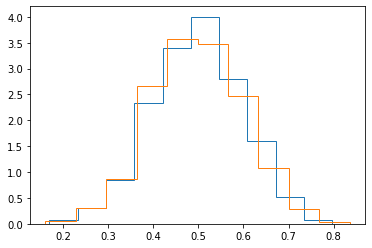

In [455]:
N_samples = 1000

norm = stats.norm(.5, .1)
points = norm.rvs(N_samples)
_ = plt.hist(points, histtype='step', density=True)
print("TRUE")
print(0.5, 0.1, percentile_around_mean_normal(.5, .1))

predicted_distr = stats.norm(np.mean(points), np.std(points))
predicted_points = predicted_distr.rvs(N_samples)
_ = plt.hist(predicted_points, histtype='step', density=True)
print("FIT")
print(np.mean(points), np.std(points), percentile_around_mean_normal(np.mean(points), np.std(points)))